In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import ot
from sample_generator import sample_generation
from trend_decompose import l1filter
from robustOPW import get_prob,res2prob
from utils import visualize

In [2]:
# sample_list = sample_generation()
# data = sample_list[0]
data = pd.read_csv('data/data.csv')
data.head()

,x,y1,y2
0,0,0.1,0.100002
1,1,0.1,0.100004
2,2,0.1,0.100006
3,3,0.1,0.100010
4,4,0.1,0.100016


In [3]:
y1 = data["y1"].values
y2 = data["y2"].values
y1[40]+=0.5

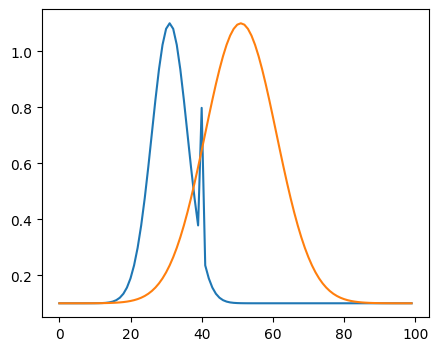

In [4]:
plt.figure(figsize = (5,4))
plt.plot(y1, label="y1")
plt.plot(y2, label="y2")
plt.show()

In [5]:
y1_prob, y2_prob = get_prob(y1,y2)

In [6]:
y1_trend = l1filter(y1,0.5)
y2_trend = l1filter(y2,2)

y1_res = y1 - y1_trend
y2_res = y2 - y2_trend

y1_prob = res2prob(y1_res).reshape(-1,1)
y2_prob = res2prob(y2_res).reshape(-1,1)

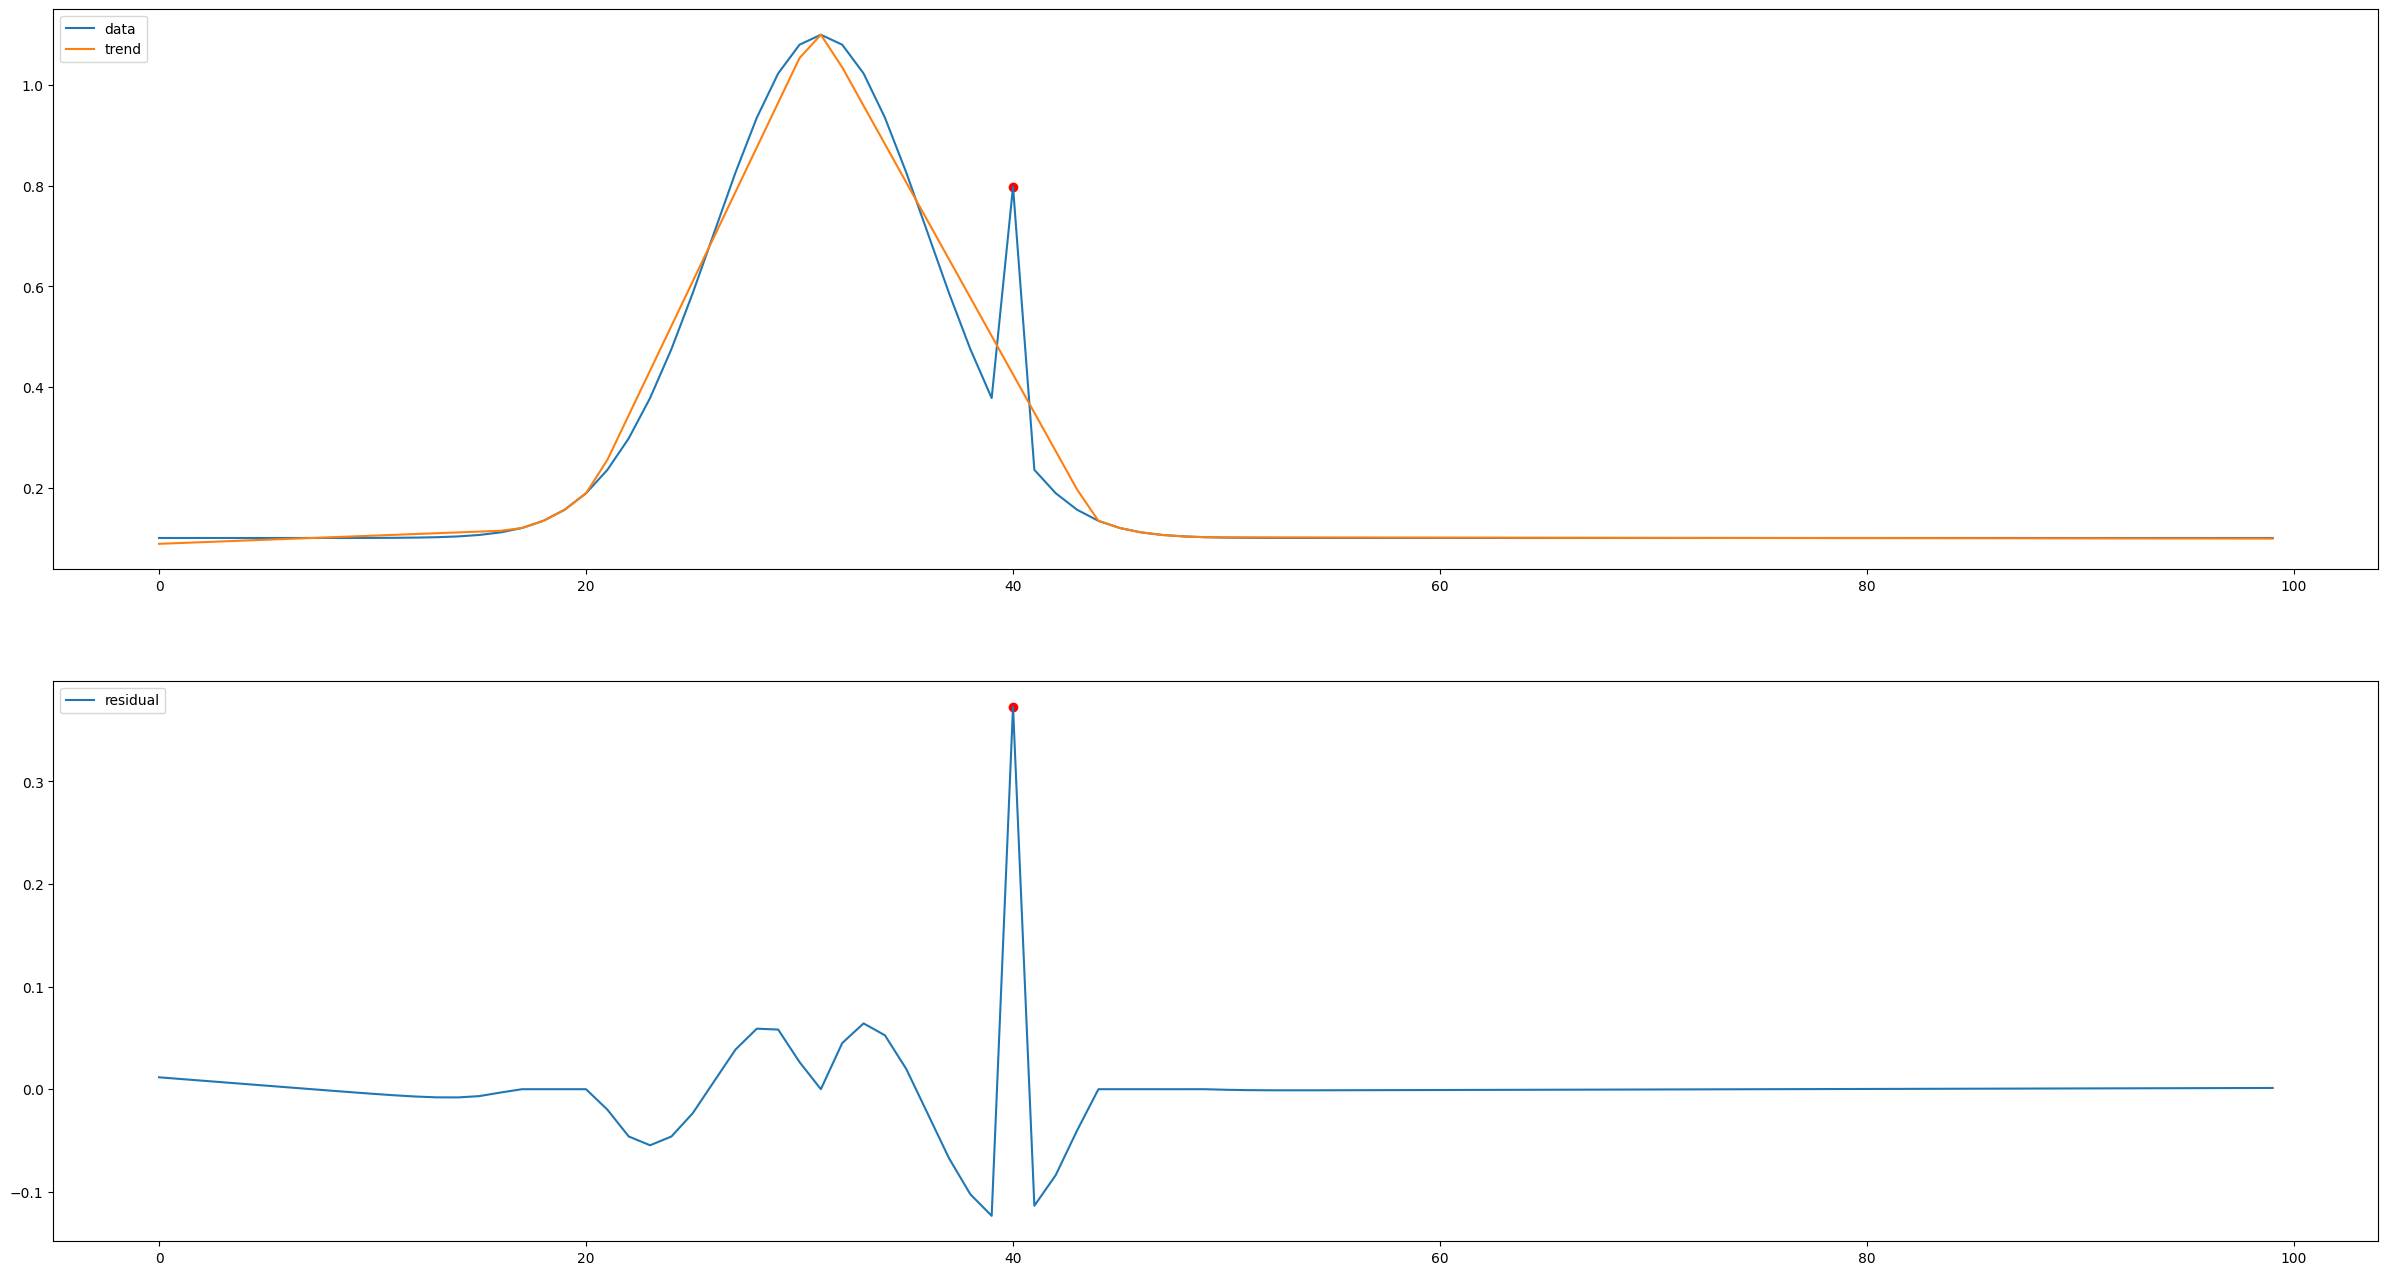

In [7]:



visualize(y1,y1_trend,threshold=0.3)

### Dữ liệu tự tạo

In [8]:
y1 = np.array([-10,1, 4, 3, 6, 5, 8, 7,-5, 7.5])
y2 = np.array([4, 1,20,20, 3, 6, 7, 5, 8, 7.5])

# y1 = (y1 - np.min(y1))/(np.max(y1) - np.min(y1))

# y2 = (y2 - np.mean(y2))/np.std(y2)

In [9]:
y1_trend = l1filter(y1,1)
y2_trend = l1filter(y2,1)

y1_res = y1 - y1_trend
y2_res = y2 - y2_trend

y1_prob = res2prob(y1_res).reshape(-1,1)
y2_prob = res2prob(y2_res).reshape(-1,1)

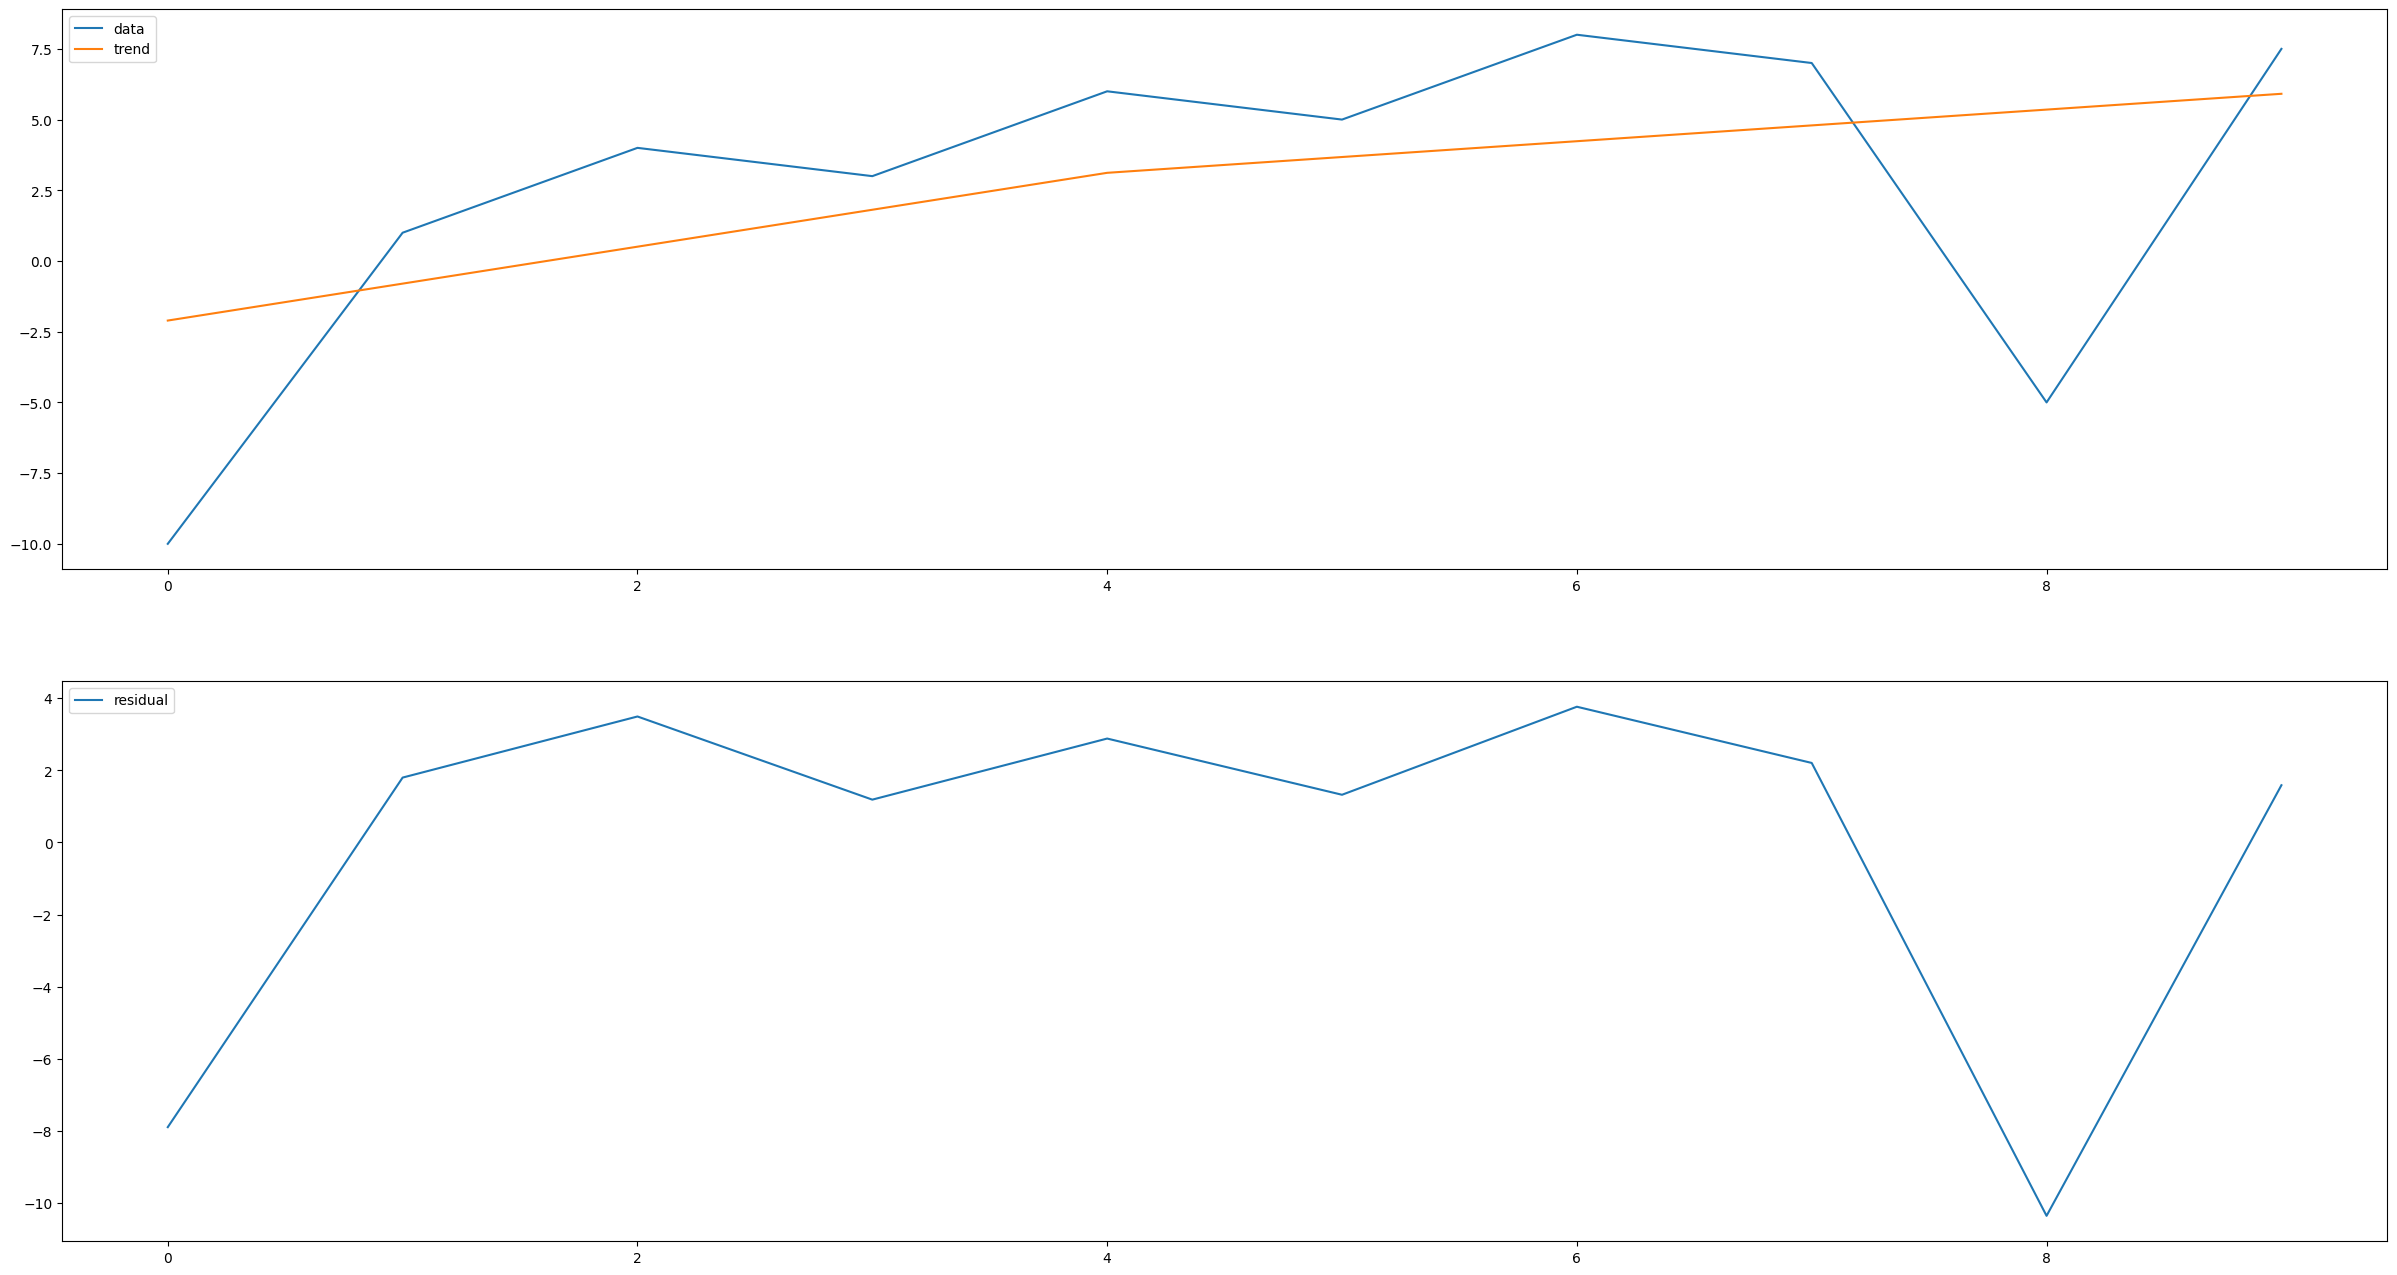

In [10]:
visualize(y1,y1_trend)

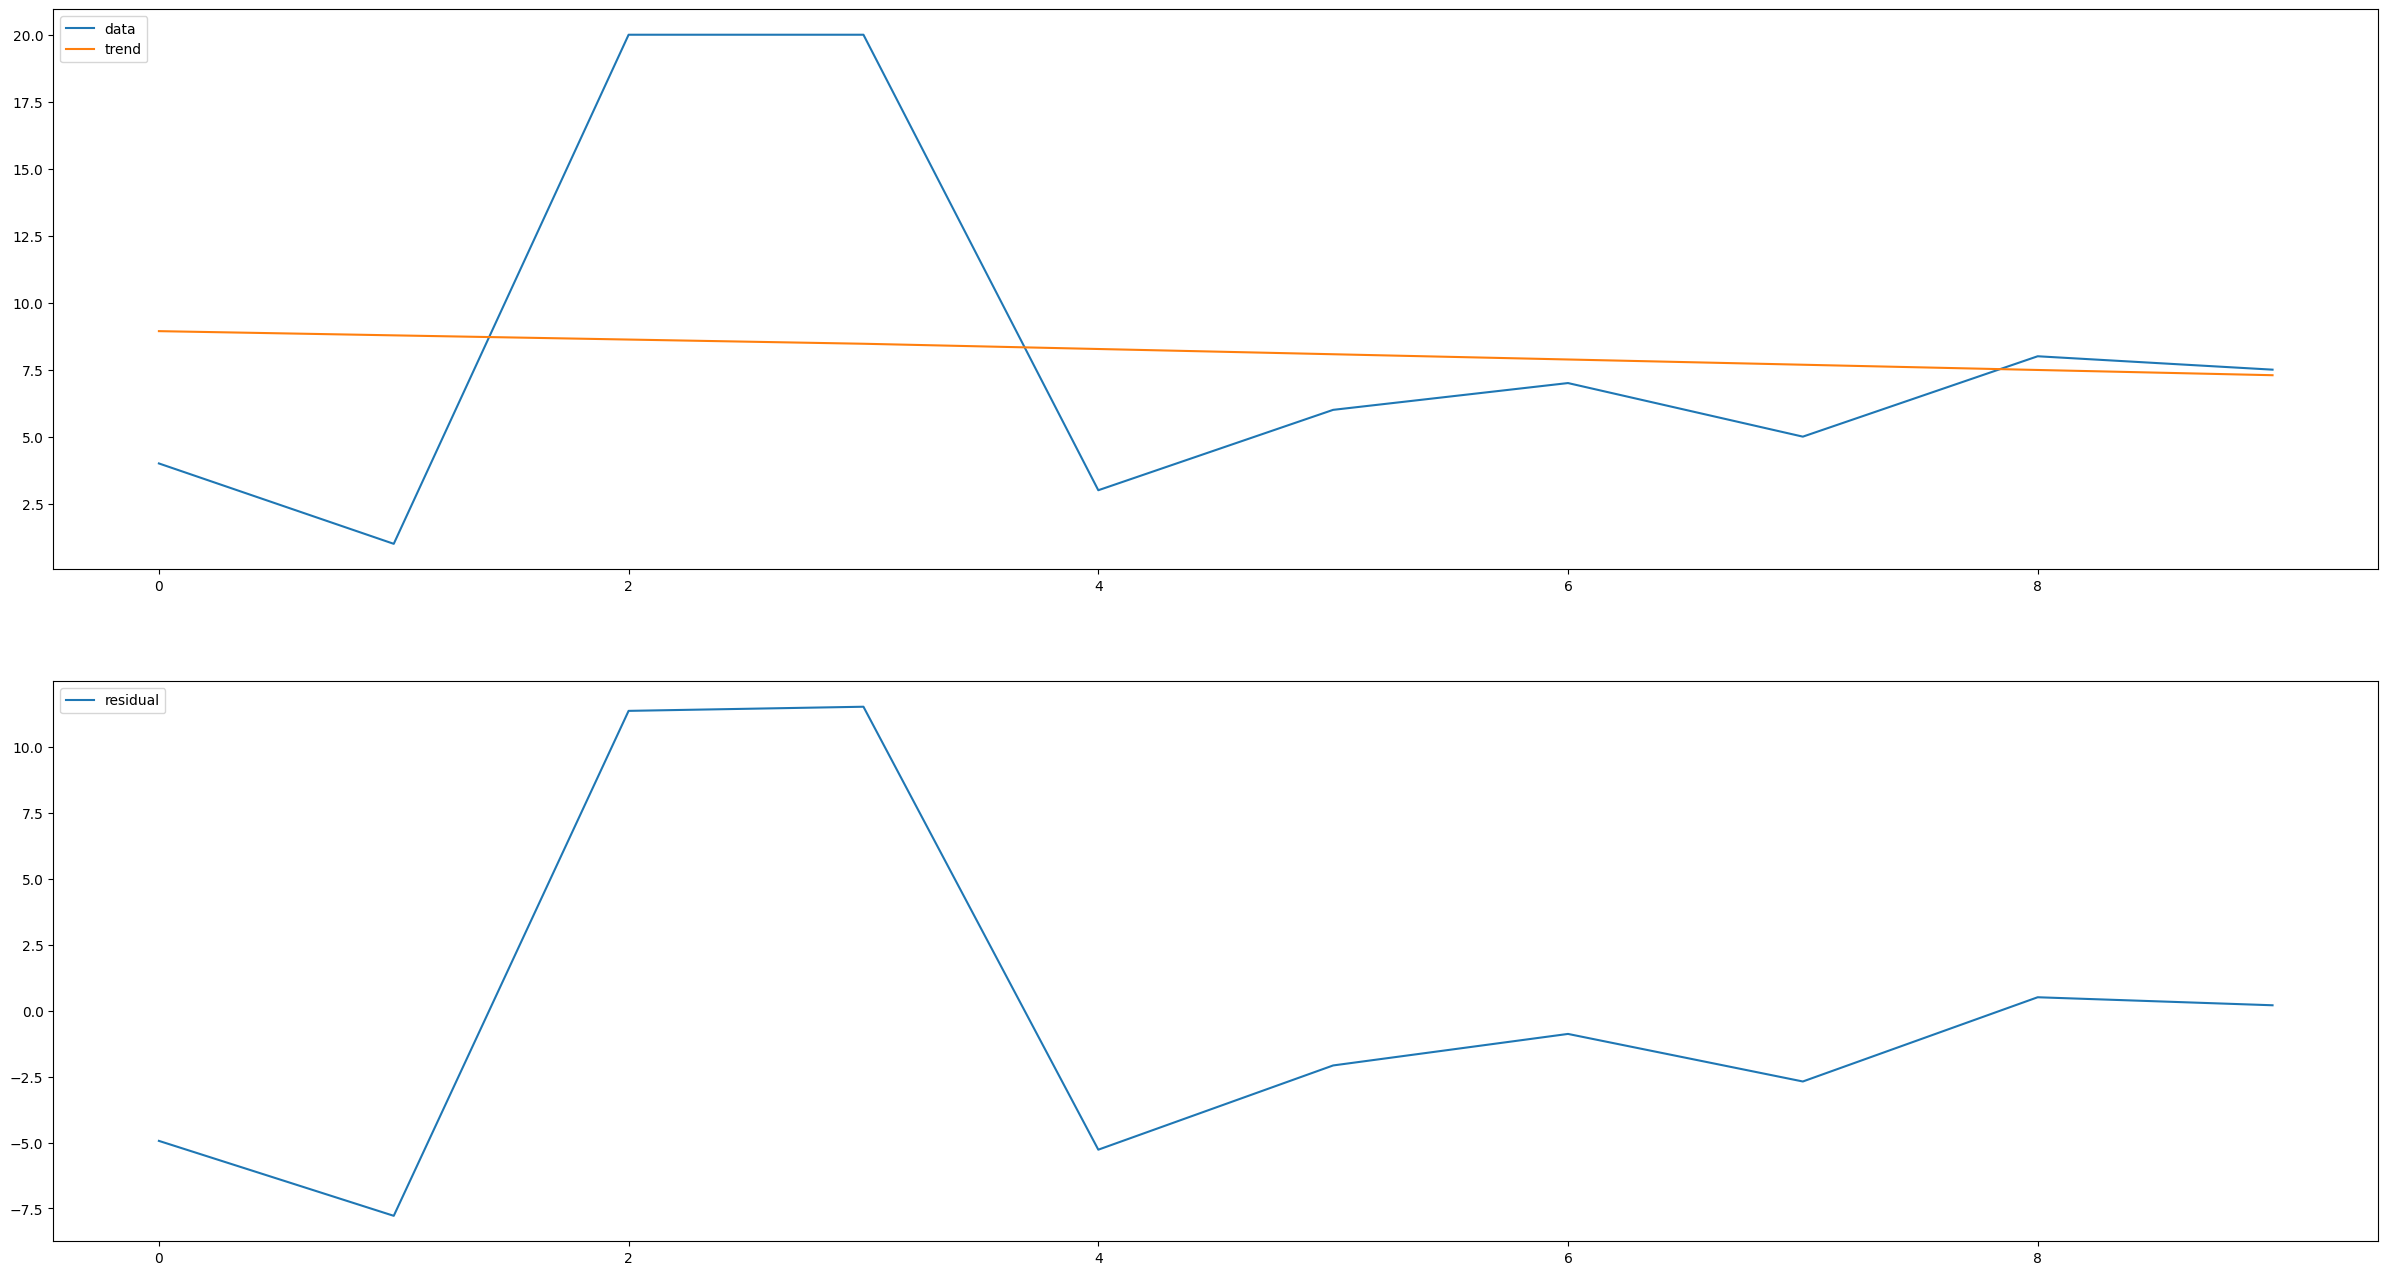

In [11]:
visualize(y2,y2_trend)

In [12]:
y1_prob.round(3)

array([[0.007],
       [0.143],
       [0.061],
       [0.194],
       [0.083],
       [0.181],
       [0.053],
       [0.117],
       [0.002],
       [0.159]])

In [13]:
y2_prob.round(3)

array([[0.027],
       [0.007],
       [0.001],
       [0.001],
       [0.023],
       [0.114],
       [0.207],
       [0.084],
       [0.248],
       [0.289]])

In [14]:
join_prob = y1_prob.dot(y2_prob.T)

<AxesSubplot:>

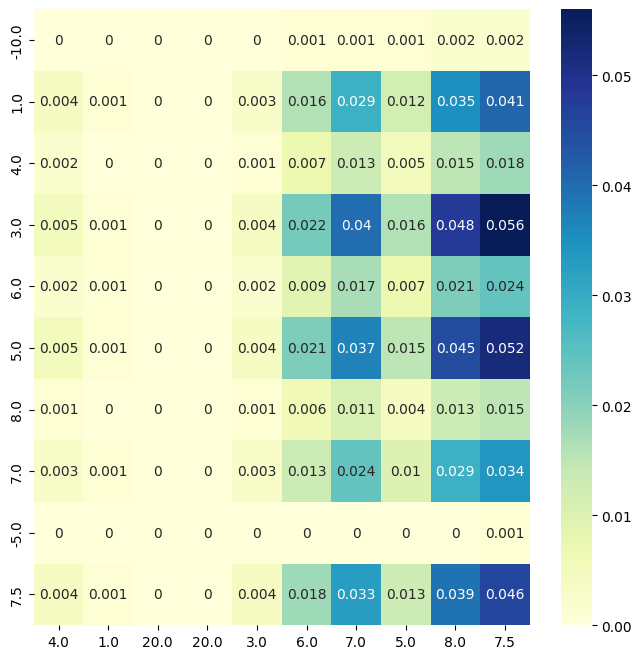

In [15]:
import seaborn as sns 

plt.figure(figsize=(8, 8))
sns.heatmap(join_prob.round(3),cmap="YlGnBu",annot = True,xticklabels=y2.reshape(10,), yticklabels=y1.reshape(10,))